In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
ticker = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

In [5]:
tickers = ticker.Ticker.to_list()

In [6]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%***********************]  101 of 101 completed


### df is our dataframe of daily price

In [7]:
df = df.dropna(axis=1)

In [8]:
#df.pct_change() -- daily return

### mtl is our dataframe of monthly changes from index 1

<br><font color= blue> .resample('M) changes all of the daily returns to momthly returns </font>

In [9]:
mtl = (df.pct_change() +1)[1:].resample('M').prod() #[1:] skips N/A on first row

At this point, it's indexed to 1, so whatever 'mtl' shows is the monthly movement from '1', simply subtract "1" from the number to get the % monthly change

In [10]:
mtl.head(5)

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.911403,0.878195,0.853705,0.952592,0.936246,0.995976,1.052189,0.873744,0.770661,1.033763,...,1.015748,1.400000,0.954668,0.737877,0.867818,0.928666,0.896149,0.981754,0.967069,0.979265
2010-02-28,1.065396,1.072755,1.084570,1.020103,1.171921,0.982246,0.965333,1.009773,1.060322,0.968023,...,0.988372,1.214285,1.029619,1.095915,1.083555,1.006401,1.055729,0.981576,1.050236,1.001444
2010-03-31,1.148470,1.020779,0.992336,1.077120,1.053802,1.016657,1.068508,1.100490,1.171934,1.057057,...,1.170588,0.852941,1.021461,1.147488,1.003691,0.996466,1.008140,1.052497,1.084751,1.030484
2010-04-30,1.111022,0.949958,1.038515,0.975264,1.156910,1.003510,0.879007,1.023014,0.978425,0.957721,...,1.055276,1.356322,1.012964,1.077684,1.067762,0.993617,0.948618,0.947695,1.146197,1.025943
2010-05-31,0.983875,0.954762,0.982144,0.942587,0.860841,0.943656,0.877647,0.942779,0.944873,0.903507,...,1.050000,0.872881,0.945278,1.178244,0.938870,1.079586,0.892185,0.915058,0.972373,0.942069


## Creating the Momentum Factors: What does this function do?

Takes 2 inputs, in our case, because we are going by monthly intervals, the 'df' component takes in the monthly returns (index to 1) as the baseline.<br><br> It then takes in an 'n' value which is the number of months you want to roll over. <br> <br> **For example, Given we are starting with 'mtl' being the t / t-1 return, if we have an 'n' value of 12, then it will take the t / t-12 return (12-monthly trailing return)**<br>

In [11]:
def get_rolling_ret(df,n):
    return df.rolling(n).apply(np.prod)

<br> **Now, for whatever "momentum" strategy we're trying to backtest, we can define different lookback periods...**

In [12]:
ret_12, ret_6, ret_3 = get_rolling_ret(mtl, 12), get_rolling_ret(mtl, 6), get_rolling_ret(mtl, 3)

<br><font color= blue> This Dataframe is the previous month's (e.g. t-1) returns. Given academic research shows that we should do t-1 for 12month and 6month momentum, lag_aqr is used to make the factors more robust </font>

In [17]:
lag_aqr = mtl.shift(1)
lag_aqr.head(5)

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,0.911403,0.878195,0.853705,0.952592,0.936246,0.995976,1.052189,0.873744,0.770661,1.033763,...,1.015748,1.400000,0.954668,0.737877,0.867818,0.928666,0.896149,0.981754,0.967069,0.979265
2010-03-31,1.065396,1.072755,1.084570,1.020103,1.171921,0.982246,0.965333,1.009773,1.060322,0.968023,...,0.988372,1.214285,1.029619,1.095915,1.083555,1.006401,1.055729,0.981576,1.050236,1.001444
2010-04-30,1.148470,1.020779,0.992336,1.077120,1.053802,1.016657,1.068508,1.100490,1.171934,1.057057,...,1.170588,0.852941,1.021461,1.147488,1.003691,0.996466,1.008140,1.052497,1.084751,1.030484
2010-05-31,1.111022,0.949958,1.038515,0.975264,1.156910,1.003510,0.879007,1.023014,0.978425,0.957721,...,1.055276,1.356322,1.012964,1.077684,1.067762,0.993617,0.948618,0.947695,1.146197,1.025943


### Constructing the AQR Robust Momentum returns:

In [18]:
def robust_aqr(ret_n, lag):
    return ret_n - lag

In [35]:
ret_12_minus_1 = robust_aqr(ret_12, lag_aqr)
ret_6_minus_1 = robust_aqr(ret_6, lag_aqr)
ret_3_minus_1 = robust_aqr(ret_3, lag_aqr)
ret_12_minus_1.tail(3)

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31,0.150345,-0.247204,-0.082443,0.167282,-0.251217,0.210701,-0.538663,-0.219387,-0.247011,0.411510,...,-0.165689,0.105736,-0.004872,0.385574,-0.055857,-0.037443,0.659513,-0.085118,-0.313973,0.168552
2022-11-30,-0.208831,-0.642404,-0.052352,0.096765,-0.352732,0.218268,-0.616562,-0.326107,-0.457735,0.286126,...,-0.170641,0.061871,0.038139,0.262356,-0.081457,-0.249793,0.614950,-0.193223,-0.640534,0.115199
2022-12-31,-0.217987,-0.489536,-0.256117,-0.104472,-0.273428,-0.013113,-0.702505,-0.618401,-0.848760,0.149669,...,-0.111416,-0.115686,-0.287569,0.203712,-0.224863,-0.236658,0.324331,-0.379310,-0.484825,-0.022493


### Portfolio Construction

<br><font color= blue> nlargest(x): </font> Allows you to screen for the largest values within that specific date<br><br><font color= blue>

In [28]:
top_50 = ret_12.loc['2010-12-31'].nlargest(50).index # index just shows the index, e.g. the tickers
top_50

Index(['NFLX', 'SIRI', 'LULU', 'ILMN', 'FTNT', 'BKNG', 'DLTR', 'DXCM', 'TMUS',
       'CTSH', 'INTU', 'PCAR', 'ORLY', 'ODFL', 'AVGO', 'MAR', 'AAPL', 'ADSK',
       'ROST', 'FAST', 'SGEN', 'BKR', 'SBUX', 'HON', 'CDNS', 'CSGP', 'MNST',
       'WBD', 'CSX', 'REGN', 'AMZN', 'CMCSA', 'LRCX', 'IDXX', 'MELI', 'KDP',
       'TXN', 'BIIB', 'MCHP', 'COST', 'ADI', 'FISV', 'SNPS', 'MDLZ', 'ANSS',
       'EBAY', 'XEL', 'ATVI', 'ASML', 'VRSK'],
      dtype='object')

<br> **Slight changes but primarily the same when you take out the t-1 return out**

In [34]:
top_50_ = ret_12_minus_1.loc['2010-12-31'].nlargest(50).index # index just shows the index, e.g. the tickers
top_50_

Index(['NFLX', 'SIRI', 'LULU', 'ILMN', 'DXCM', 'BKNG', 'FTNT', 'DLTR', 'INTU',
       'CTSH', 'ORLY', 'SGEN', 'PCAR', 'ODFL', 'ADSK', 'AVGO', 'AAPL', 'TMUS',
       'MAR', 'CDNS', 'WBD', 'FAST', 'ROST', 'CSX', 'CMCSA', 'SBUX', 'HON',
       'LRCX', 'MELI', 'MNST', 'CSGP', 'BKR', 'AMZN', 'KDP', 'MDLZ', 'REGN',
       'BIIB', 'IDXX', 'EBAY', 'SNPS', 'TXN', 'FISV', 'MCHP', 'XEL', 'ADI',
       'COST', 'ASML', 'ANSS', 'AEP', 'CTAS'],
      dtype='object')

### <br> **Important!!**

The most important part about all of this when constructing the backtest of what should be in the portfolio at each point in time is the actual tickers that are going to be in there. Its a seperate process to actually calculating the values, its more related to identifying which TICKERS will actually be included<br>

### Conditional Sorts:

Taking: <br>1) The top 50 based on momentum signal (12_minus_1 momentum)<br><br>2) You can sort based on something else, e.g. their Ranking based on something else, perhaps E/P etc. etc.

In [39]:
def portfolio_sorts(date):
    top_50_ = ret_12_minus_1.loc[date].nlargest(50).index
    top_30 = ret_6_minus_1.loc[date, top_50_].nlargest(30).index # This line can keep going into however many sorts you'd like, though at the moment it's just using the 6-month momentum within the 12-month momentum
    return top_30

In [40]:
portfolio_sorts('2010-12-31')

Index(['BKNG', 'FTNT', 'SIRI', 'LULU', 'ADSK', 'AMZN', 'CDNS', 'INTU', 'CTSH',
       'EBAY', 'NFLX', 'CSGP', 'ASML', 'PCAR', 'BIIB', 'TMUS', 'LRCX', 'REGN',
       'DXCM', 'ILMN', 'ODFL', 'TXN', 'MAR', 'SGEN', 'CSX', 'HON', 'ADI',
       'CMCSA', 'MELI', 'MNST'],
      dtype='object')

<br>

## Calculating the values

Below, 1) we are taking the monthly return data from the date provided, and then slicing just the [1:2] value which is the 2nd to the 3rd not including the 3rd<br><br> 2)  Then we add the portfolio_sorts(date) function/argument to get only for those specific tickers that are in this strategy

In [45]:
portfolio = mtl.loc['2010-12-31':, portfolio_sorts('2010-12-31')][1:2]

<br> **So we've calculated each monthly return for the tickers provided that are in the strategy in that month, then we take the "mean" to equally weight across all of those 30 stocks**

In [61]:
print(f' The portfolio return on 2010-12-31 is {portfolio.mean(axis=1).values[0]} or \n\n as a percentage,  {round((portfolio.mean(axis=1).values[0])-1, 4)}%')

 The portfolio return on 2010-12-31 is 1.0389273236677155 or 

 as a percentage,  0.0389%


### <br><font color= red> Wrapping into a function </font> 

In [77]:
def pf_performance(date):
    portfolio = mtl.loc[date:, portfolio_sorts(date)][1:2]
    return portfolio.mean(axis=1).values[0]

### Insert any date to find the portfolio performance on that date:

In [67]:
pf_performance('2020-12-31')

 The portfolio return on 2020-12-31 is 0.9784092103453853 or 

 as a percentage,  -0.0216%


<br>

# Time for the backtest

Step 1: Set & Identify the dates you want to to from. *Example:*

In [75]:
period = mtl.index[:-1]

In [81]:
period

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=155, freq='M')

<br><font color= red>returns.append(pf_performance(date)): </font> <br> 
Defines the portfolio by using the 'portfolio_sorts' that has idenified which stocks included at each date - and takes their mean returns each date

In [84]:
returns = []

for date in period: #iterating through the values on the dates that are chosen.
    returns.append(pf_performance(date))

    
returns1 = pd.Series(returns, index=mtl.index[1:])
print(returns1)

Date
2010-02-28         NaN
2010-03-31         NaN
2010-04-30         NaN
2010-05-31         NaN
2010-06-30         NaN
                ...   
2022-08-31    0.950107
2022-09-30    0.933706
2022-10-31    1.086992
2022-11-30    1.077459
2022-12-31    0.946451
Freq: M, Length: 155, dtype: float64


### To include rough slippage you can add:

In [97]:
slippage = pd.Series([i - 0.01 for i in returns], index=mtl.index[1:]).cumprod()
slippage

Date
2010-02-28         NaN
2010-03-31         NaN
2010-04-30         NaN
2010-05-31         NaN
2010-06-30         NaN
                ...   
2022-08-31    2.605389
2022-09-30    2.406613
2022-10-31    2.591904
2022-11-30    2.766750
2022-12-31    2.590925
Freq: M, Length: 155, dtype: float64

### <br><font color= blue> Comparing with a benchmark </font>

In [94]:
nas_df = yf.download('^IXIC', start = '2010-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [95]:
mtl_benchmark = (nas_df.pct_change() +1)[1:].resample('M').prod() #[1:] skips N/A on first row

In [109]:
benchmark = mtl_benchmark[11:].cumprod()
benchmark

Date
2010-12-31    1.061900
2011-01-31    1.080797
2011-02-28    1.113697
2011-03-31    1.113216
2011-04-30    1.150230
                ...   
2022-08-31    4.729829
2022-09-30    4.233245
2022-10-31    4.398374
2022-11-30    4.590450
2022-12-31    4.193417
Freq: M, Name: Adj Close, Length: 145, dtype: float64

In [110]:
columns = ['Strategy' , 'Benchmark']

In [111]:
compare = pd.concat([slippage[10:], benchmark], axis =1)
compare.columns = columns

<AxesSubplot:xlabel='Date'>

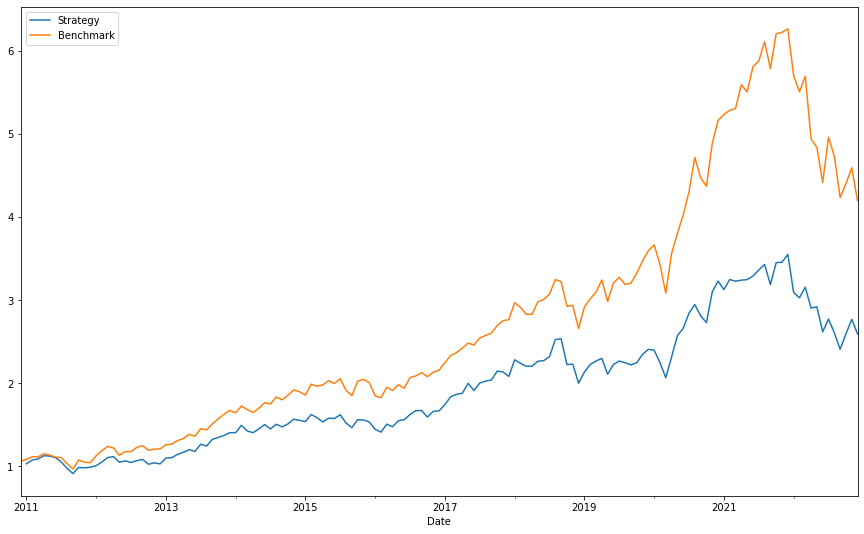

In [118]:
compare.plot(figsize=[15,9])